In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import zscore

# EDA

In [3]:
dados = pd.read_csv("C:\Projetos Pessoais\DataScience\segmentacao_Clientes_Ecomerce\data\dados_limpos_pre_EDA.csv")

In [4]:
dados

,Codigo,Descricao,Quantidade,Valor_unitario,Cod_cliente,Pais,Valor_total,Horario_venda,Data_venda
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,08:26:00,2010-12-01
1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,08:26:00,2010-12-01
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,08:26:00,2010-12-01
...,...,...,...,...,...,...,...,...,...
530098,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,12:50:00,2011-12-09
530099,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,12:50:00,2011-12-09
530100,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,12:50:00,2011-12-09
530101,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,12:50:00,2011-12-09


In [5]:
dados['Horario_venda'] = pd.to_datetime(dados['Horario_venda'])
dados['Data_venda'] = pd.to_datetime(dados['Data_venda'])
dados.info()

C:\Users\alyss\AppData\Local\Temp\ipykernel_4432\3973933551.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados['Horario_venda'] = pd.to_datetime(dados['Horario_venda'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530103 entries, 0 to 530102
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Codigo          530103 non-null  object        
 1   Descricao       530103 non-null  object        
 2   Quantidade      530103 non-null  int64         
 3   Valor_unitario  530103 non-null  float64       
 4   Cod_cliente     530103 non-null  int64         
 5   Pais            530103 non-null  object        
 6   Valor_total     530103 non-null  float64       
 7   Horario_venda   530103 non-null  datetime64[ns]
 8   Data_venda      530103 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 36.4+ MB


In [18]:
# Criação das variáveis mês e ano
dados['Mes'] = dados['Data_venda'].dt.month
dados['Ano'] = dados['Data_venda'].dt.year

In [19]:
dados

,Codigo,Descricao,Quantidade,Valor_unitario,Cod_cliente,Pais,Valor_total,Horario_venda,Data_venda,Mes,Ano
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,2023-10-12 08:26:00,2010-12-01,12,2010
1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,2023-10-12 08:26:00,2010-12-01,12,2010
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,2023-10-12 08:26:00,2010-12-01,12,2010
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,2023-10-12 08:26:00,2010-12-01,12,2010
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,2023-10-12 08:26:00,2010-12-01,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
530098,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,2023-10-12 12:50:00,2011-12-09,12,2011
530099,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,2023-10-12 12:50:00,2011-12-09,12,2011
530100,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,2023-10-12 12:50:00,2011-12-09,12,2011
530101,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,2023-10-12 12:50:00,2011-12-09,12,2011


In [6]:
# Vendas gerais
vendas_Gerais = dados.groupby('Pais')['Valor_total'].sum().sort_values(ascending = False).reset_index()
vendas_Gerais

,Pais,Valor_total
0,United Kingdom,9014160.024
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,57089.900
8,Belgium,41196.340
9,Sweden,38378.330


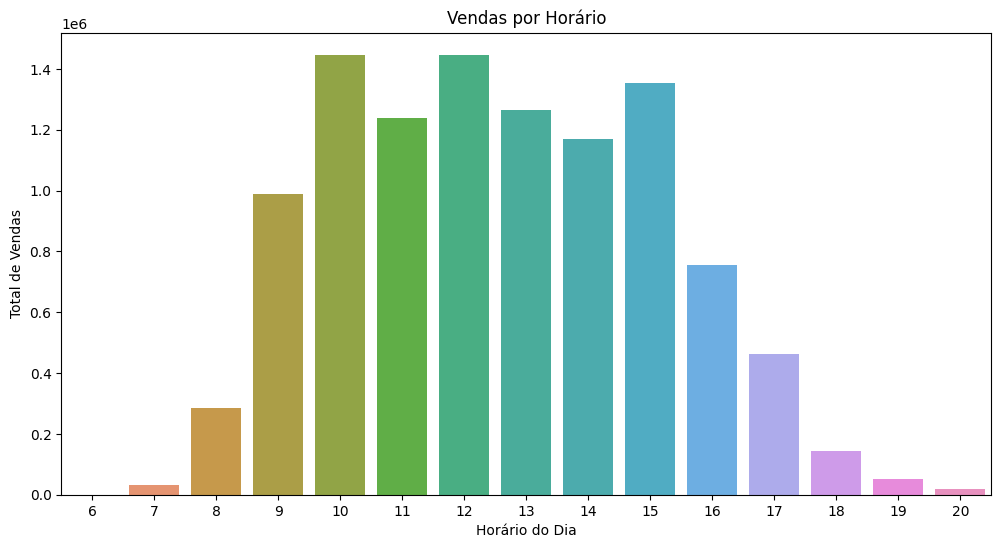

In [22]:
# Vendas de Produtos por horário

vendas_por_horario = dados.groupby(dados['Horario_venda'].dt.hour)['Valor_total'].sum().reset_index()

# Crie um gráfico de barras usando o Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_por_horario, x='Horario_venda', y='Valor_total')
plt.title('Vendas por Horário')
plt.xlabel('Horário do Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)  # Para manter os rótulos dos horários na horizontal
plt.show()

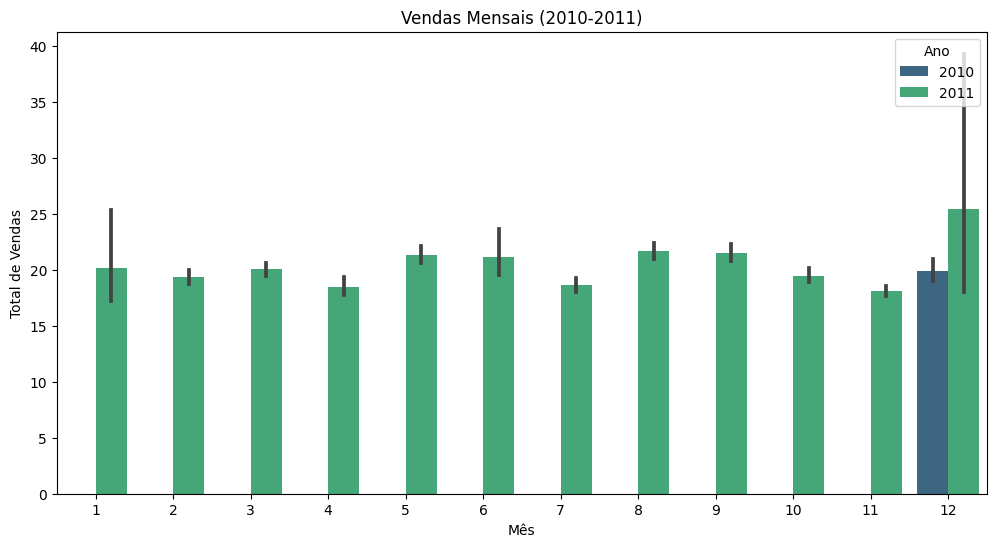

In [23]:
# Vendas de produtos por mês

dados_filtrados = dados[(dados['Ano'] == 2010) | ((dados['Ano'] == 2011) & (dados['Mes'] <= 12))]

# Crie um gráfico de barras usando o Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=dados_filtrados, x='Mes', y='Valor_total', hue='Ano', palette='viridis')
plt.title('Vendas Mensais (2010-2011)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)  # Para manter os rótulos dos meses na horizontal
plt.legend(title='Ano')
plt.show()

## Quantidades de produtos com maiores saídas

In [35]:
# Produtos mais vendidos no Reino Unido

produto_popular_UK = dados[dados['Pais'] == 'United Kingdom']\
            .groupby('Descricao')[['Quantidade', 'Valor_total']]\
            .sum().sort_values(by = 'Valor_total', ascending = False).reset_index()
produto_popular_UK.head(10)

,Descricao,Quantidade,Valor_total
0,DOTCOM POSTAGE,706,206248.77
1,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
2,REGENCY CAKESTAND 3 TIER,11068,142273.29
3,WHITE HANGING HEART T-LIGHT HOLDER,35740,100497.72
4,PARTY BUNTING,16973,93658.53
5,JUMBO BAG RED RETROSPOT,44264,86471.34
6,MEDIUM CERAMIC TOP STORAGE JAR,77036,80575.63
7,PAPER CHAIN KIT 50'S CHRISTMAS,18530,62742.54
8,ASSORTED COLOUR BIRD ORNAMENT,33735,54756.79
9,CHILLI LIGHTS,10154,53336.56


In [36]:
# Produtos mais vendidos fora do Reino Unido

produto_popular_outros = dados[dados['Pais'] != 'United Kingdom']\
            .groupby('Descricao')[['Quantidade', 'Valor_total']]\
            .sum().sort_values(by = 'Valor_total', ascending = False).reset_index()
produto_popular_outros.head(10)

,Descricao,Quantidade,Valor_total
0,POSTAGE,3084,69194.94
1,Manual,45,42820.12
2,REGENCY CAKESTAND 3 TIER,2811,32211.45
3,RABBIT NIGHT LIGHT,15486,28877.04
4,ROUND SNACK BOXES SET OF4 WOODLAND,6865,18504.55
5,SPACEBOY LUNCH BOX,8376,14470.80
6,DOLLY GIRL LUNCH BOX,7365,12595.35
7,ROUND SNACK BOXES SET OF 4 FRUITS,4593,12282.15
8,RED TOADSTOOL LED NIGHT LIGHT,6795,10491.75
9,SET OF 3 REGENCY CAKE TINS,1910,8545.70


In [39]:
# Vendas no país que mais compra fora da Europa

produto_popular_outros = dados[dados['Pais'] == 'Australia']\
            .groupby('Descricao')[['Quantidade', 'Valor_total']]\
            .sum().sort_values(by = 'Valor_total', ascending = False).reset_index()
produto_popular_outros.head(10)

,Descricao,Quantidade,Valor_total
0,RABBIT NIGHT LIGHT,1884,3375.84
1,SET OF 6 SPICE TINS PANTRY DESIGN,600,2082.00
2,RED TOADSTOOL LED NIGHT LIGHT,1344,1987.20
3,SET OF 3 CAKE TINS PANTRY DESIGN,464,1983.20
4,REGENCY CAKESTAND 3 TIER,180,1978.20
5,RED HARMONICA IN BOX,1704,1810.80
6,DOLLY GIRL LUNCH BOX,1024,1689.60
7,MINI PAINT SET VINTAGE,2952,1630.80
8,SPACEBOY LUNCH BOX,960,1584.00
9,RED RETROSPOT ROUND CAKE TINS,168,1503.60


## Desempenho dos clientes

In [43]:
melhores_compradores = dados[dados['Pais'] == 'United Kingdom']\
            .groupby('Cod_cliente')[['Quantidade', 'Valor_total']]\
            .sum().sort_values(by = 'Valor_total', ascending = False).reset_index()
melhores_compradores.head(20)

,Cod_cliente,Quantidade,Valor_total
0,18102,64124,259657.30
1,17450,69993,194550.79
2,16446,80997,168472.50
3,17511,64549,91062.38
4,16029,40208,81024.84
5,12346,74215,77183.60
6,16684,50255,66653.56
7,14096,16352,65164.79
8,13694,63312,65039.62
9,15311,38194,60767.90
